In [5]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

/Users/nadhir/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from subprocess import check_output
np.random.seed(0)

def read_text_file(file_text):
    df_allReviews = pd.read_csv(file_text)
    df = df_allReviews.loc[:,["Text","Summary","Score"]]
    df.dropna(how="any", inplace=True)    
    return df

df = read_text_file("Reviews.csv")
print (df.head(7))

                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   
5  I got a wild hair for taffy and ordered this f...   
6  This saltwater taffy had great flavors and was...   

                                         Summary  Score  
0                          Good Quality Dog Food      5  
1                              Not as Advertised      1  
2                          "Delight" says it all      4  
3                                 Cough Medicine      2  
4                                    Great taffy      5  
5                                     Nice Taffy      4  
6  Great!  Just as good as the expensive brands!      5  


In [4]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")
#df["Usefulness"] = (df["VotesHelpful"]/messages["VotesTotal"]).apply(lambda n: "useful" if n > 0.8 else "useless")

df.head(5)

,Text,Summary,Score,Sentiment
0,I have bought several of the Vitality canned d...,Good Quality Dog Food,5,positive
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,1,negative
2,This is a confection that has been around a fe...,"""Delight"" says it all",4,positive
3,If you are looking for the secret ingredient i...,Cough Medicine,2,negative
4,Great taffy at a great price. There was a wid...,Great taffy,5,positive


In [4]:
df[df.Score==5].head(10)

,Text,Summary,Score,Sentiment
0,I have bought several of the Vitality canned d...,Good Quality Dog Food,5,positive
4,Great taffy at a great price. There was a wid...,Great taffy,5,positive
6,This saltwater taffy had great flavors and was...,Great! Just as good as the expensive brands!,5,positive
7,This taffy is so good. It is very soft and ch...,"Wonderful, tasty taffy",5,positive
8,Right now I'm mostly just sprouting this so my...,Yay Barley,5,positive
9,This is a very healthy dog food. Good for thei...,Healthy Dog Food,5,positive
10,I don't know if it's the cactus or the tequila...,The Best Hot Sauce in the World,5,positive
11,One of my boys needed to lose some weight and ...,"My cats LOVE this ""diet"" food better than thei...",5,positive
14,The Strawberry Twizzlers are my guilty pleasur...,Strawberry Twizzlers - Yummy,5,positive
15,My daughter loves twizzlers and this shipment ...,"Lots of twizzlers, just what you expect.",5,positive


In [5]:
df[df.Score==1].head(10)

,Text,Summary,Score,Sentiment
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,1,negative
12,My cats have been happily eating Felidae Plati...,My Cats Are Not Fans of the New Food,1,negative
26,"The candy is just red , No flavor . Just plan...",Nasty No flavor,1,negative
50,"This oatmeal is not good. Its mushy, soft, I d...",Don't like it,1,negative
62,Arrived in 6 days and were so stale i could no...,stale product.,1,negative
73,Buyer Beware Please! This sweetener is not for...,Warning! WARNING! -ALCOHOL SUGARS!,1,negative
75,No tea flavor at all. Just whole brunch of art...,No Tea Flavor,1,negative
99,I fed this to my Golden Retriever and he hated...,Bad,1,negative
153,These singles sell for $2.50 - $3.36 at the st...,Rip off Price,1,negative
164,Seriously this product was as tasteless as the...,Tasteless but low calorie,1,negative


# Natural Language Processing (Text Analysis)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleaning_text(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

df["Summary_Clean"] = df["Summary"].apply(cleaning_text)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

454742 items in training data, 113686 in test data


In [36]:
from wordcloud import WordCloud, STOPWORDS

count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

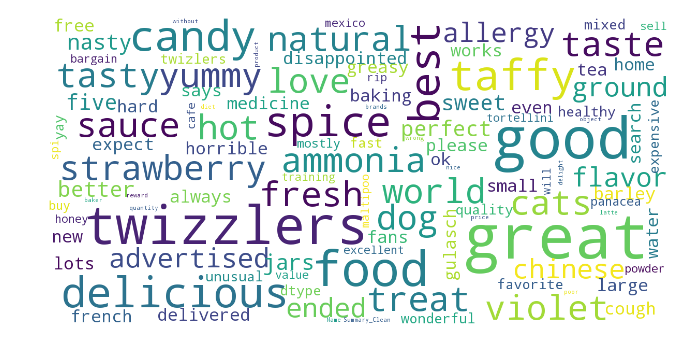

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["Summary_Clean"])


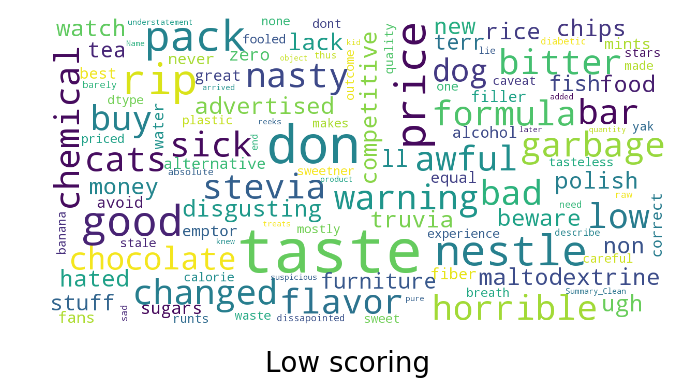

In [10]:
show_wordcloud(df[df.Score == 1]["Summary_Clean"], title = "Low rating")

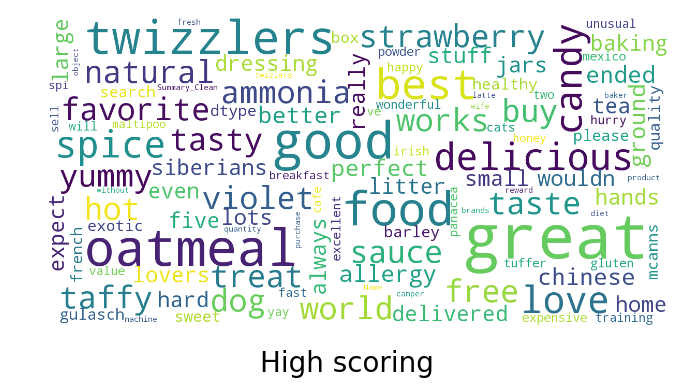

In [11]:
show_wordcloud(df[df.Score == 5]["Summary_Clean"], title = "High rating")

# Multinomial Naïve Bayes learning method

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

# Bernoulli Naïve Bayes learning method

In [13]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

# Logistic regression learning method

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

# ROC Curve for comparing the different classifiers

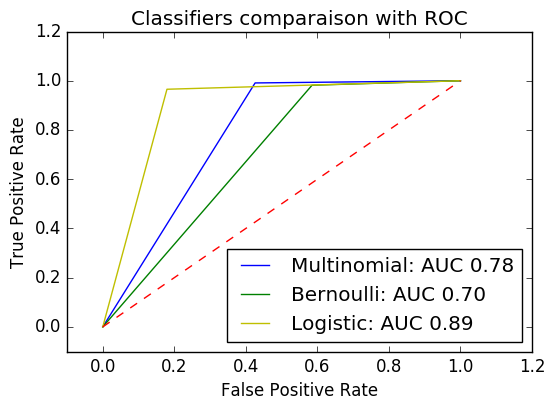

In [15]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Accuracy

In [29]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.87      0.82      0.84     24981
   negative       0.95      0.97      0.96     88705

avg / total       0.93      0.93      0.93    113686



# Multinomial Accuracy

In [30]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.95      0.57      0.71     24981
   negative       0.89      0.99      0.94     88705

avg / total       0.90      0.90      0.89    113686



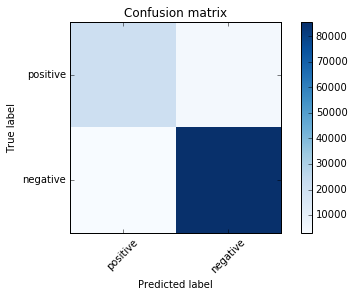

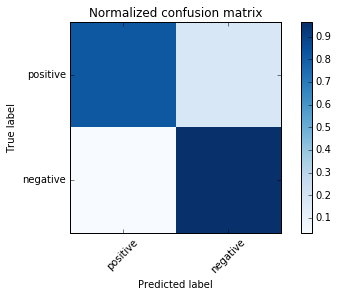

In [10]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

# Histogram of keywords occurence

In [ ]:
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [20]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg_result.coef_[0])),
    columns = ['feature', 'coef'])

In [58]:
keywords = feature_coefs.sort_values(by='coef')

In [43]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
    return result,prob

test_sample(logreg, "The food was delicious, it smelled great and the taste was awesome")
test_sample(logreg, "The whole experience was horrible. The smell was so bad that it literally made me sick.")
test_sample(logreg, "The food was ok, I guess. The smell wasn't very good, but the taste was ok.")

Sample estimated as POSITIVE: negative prob 0.012506, positive prob 0.987494
Sample estimated as NEGATIVE: negative prob 0.999911, positive prob 0.000089
Sample estimated as NEGATIVE: negative prob 0.779522, positive prob 0.220478


('negative', array([ 0.77952238,  0.22047762]))

In [101]:
def model_error(testing_set):
    df_compare = testing_set
    for k in range(len(testing_set)):
        df_compare['Sentiment_prediction'] = test_sample(logreg,testing_set.Text.values[k])[0]
        df_compare['Positive_prb'] = test_sample(logreg,testing_set.Text.values[k])[1][0]
        df['Negative_prb'] = test_sample(logreg,testing_set.Text.values[k])[1][1]
    return df_compare

# Prediction

In [22]:
#Prediction
test_sample(logreg, 'I loves it')
test_sample(logreg, 'I hates it')

Sample estimated as POSITIVE: negative prob 0.000116, positive prob 0.999884
Sample estimated as NEGATIVE: negative prob 0.999598, positive prob 0.000402


# Mean Test comparaison between Rate 1 and Rate 5

We try now to compare the two groups which are the high rating and the low rating, in fact we want to know is there any difference  

In [25]:
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.plot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

'file:///Users/nadhir/temp-plot.html'

In [4]:
#from scipy import stats
#stats.ttest_ind(df.Score==1,df.Score==5, equal_var = False)